# Predicting customer churn

## 1. Business understanding

Customer churn, also known as customer attrition, occurs when customers stop doing business with a company. Companies are interested in identifying these customers because the price for acquiring a new customer is usually higher than retaining the old one.

The goal of this project is to build a model that predicts whether a person will leave the company (churn) or stay.

[Presentation slides](https://docs.google.com/presentation/d/1f72r6iSPuMdg11WDbjVQgAET5CXt_ZN24xWGSSGN-n8/edit?usp=sharing)

## 2. Setup

### Coding constants

In [1]:
GRAPH_WIDTH = 6
GRAPH_HEIGHT = 5

### Common imports

In [2]:
%matplotlib inline 

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing libraries
import pandas as pd
import numpy as np

# Data modeling library
from sklearn.tree import DecisionTreeClassifier

### Data loading

In typical environments your data would be available in a relational database (or some other common data store) and spread across multiple tables/documents/files.

In this project, however, things are much simpler: you will only work on a single file, which contains a comma-separated values (CSV) file with all the data.

In [3]:
df = pd.read_csv('data/customer-churn.csv')
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0,31953,0,6,313378,161,0,4,3,3,1,1
1,1,36147,0,13,800586,244,0,6,3,3,2,1
2,1,27273,230,0,305049,201,16,15,3,4,3,1
3,0,120070,38,33,788235,780,3,2,3,0,2,0
4,1,29215,208,85,224784,241,21,1,4,3,0,1


Take a look at the number of records and attributes:

In [4]:
df.shape

(20000, 12)

Also, take a look at the attributes in the data:

In [5]:
df.columns

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL',
       'CONSIDERING_CHANGE_OF_PLAN', 'LEAVE'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   COLLEGE                      20000 non-null  int64
 1   INCOME                       20000 non-null  int64
 2   OVERAGE                      20000 non-null  int64
 3   LEFTOVER                     20000 non-null  int64
 4   HOUSE                        20000 non-null  int64
 5   HANDSET_PRICE                20000 non-null  int64
 6   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64
 7   AVERAGE_CALL_DURATION        20000 non-null  int64
 8   REPORTED_SATISFACTION        20000 non-null  int64
 9   REPORTED_USAGE_LEVEL         20000 non-null  int64
 10  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  int64
 11  LEAVE                        20000 non-null  int64
dtypes: int64(12)
memory usage: 1.8 MB


## 3. Data understanding

In this part, we will explore the data by generating some visualizations.

### Attributes description

It is also essential to understand the format and meaning of the values in each attribute.

Each row represents a customer of the company, with the following attributes for each customer:

| Variables                  | Description                                              | Values 
|---|---|---|
|COLLEGE                     | Is the customer college educated?                        | 0 = no, 1 = yes 
|INCOME                      | Annual income                                            | number in USD
|OVERAGE                     | Average overcharges per month                            | number in minutes
|LEFTOVER                    | Average number of leftover minutes per month             | number in minutes
|HOUSE                       | Estimated value of dwelling (from census tract)          | number in USD
|HANDSET_PRICE               | Cost of phone                                            | number in USD
|OVER_15MINS_CALLS_PER_MONTH | per month average number of long calls (15 mins or over) | number in minutes
|AVERAGE_CALL_DURATION       | Average duration of a call                               | number in minutes
|REPORTED_SATISFACTION       | Reported level of satisfaction                           | 0 = very sat, 1 = sat, 2 = avg, 3 = unsat, 4 = very unsat
|REPORTED_USAGE_LEVEL        | Self-reported usage level                                | 0 = very high, 1 = high, 2 = avg, 3 = little, 4 = very little
|CONSIDERING_CHANGE_OF_PLAN  | Whether the customer considered changing their plan      | 0 = never thought, 1 = no, 2 = considering, 3 = perhaps, 4 = actively looking into it
|LEAVE (Target variable)     | Did the customer stay or leave (churn)?                  | 0 = no, 1 = yes

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COLLEGE,20000.0,0.50240,0.500007,0.0,0.00,1.0,1.00,1.0
INCOME,20000.0,80281.44775,41680.586319,20007.0,42217.00,75366.5,115881.75,159983.0
OVERAGE,20000.0,85.97955,85.992324,-2.0,0.00,59.0,179.00,335.0
LEFTOVER,20000.0,23.89865,26.816645,0.0,0.00,14.0,41.00,89.0
HOUSE,20000.0,493155.26425,252407.884692,150002.0,263714.25,452259.5,702378.00,999996.0
HANDSET_PRICE,20000.0,389.61510,213.820682,130.0,219.00,326.0,533.25,899.0
OVER_15MINS_CALLS_PER_MONTH,20000.0,8.00070,8.925418,0.0,1.00,4.0,15.00,29.0
AVERAGE_CALL_DURATION,20000.0,6.00225,4.402558,1.0,2.00,5.0,10.00,15.0
REPORTED_SATISFACTION,20000.0,2.43390,1.629437,0.0,0.00,3.0,4.00,4.0
REPORTED_USAGE_LEVEL,20000.0,2.18495,1.511839,0.0,0.00,3.0,3.00,4.0


### Attributes variables distribution

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute.

A histogram shows the *number of instances (on the vertical axis)* that have a given *value range (on the horizontal axis)*. 

You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset (as shown in the following code example), and it will plot a histogram for each numerical attribute:

array([[<AxesSubplot:title={'center':'COLLEGE'}>,
        <AxesSubplot:title={'center':'INCOME'}>,
        <AxesSubplot:title={'center':'OVERAGE'}>],
       [<AxesSubplot:title={'center':'LEFTOVER'}>,
        <AxesSubplot:title={'center':'HOUSE'}>,
        <AxesSubplot:title={'center':'HANDSET_PRICE'}>],
       [<AxesSubplot:title={'center':'OVER_15MINS_CALLS_PER_MONTH'}>,
        <AxesSubplot:title={'center':'AVERAGE_CALL_DURATION'}>,
        <AxesSubplot:title={'center':'REPORTED_SATISFACTION'}>],
       [<AxesSubplot:title={'center':'REPORTED_USAGE_LEVEL'}>,
        <AxesSubplot:title={'center':'CONSIDERING_CHANGE_OF_PLAN'}>,
        <AxesSubplot:title={'center':'LEAVE'}>]], dtype=object)

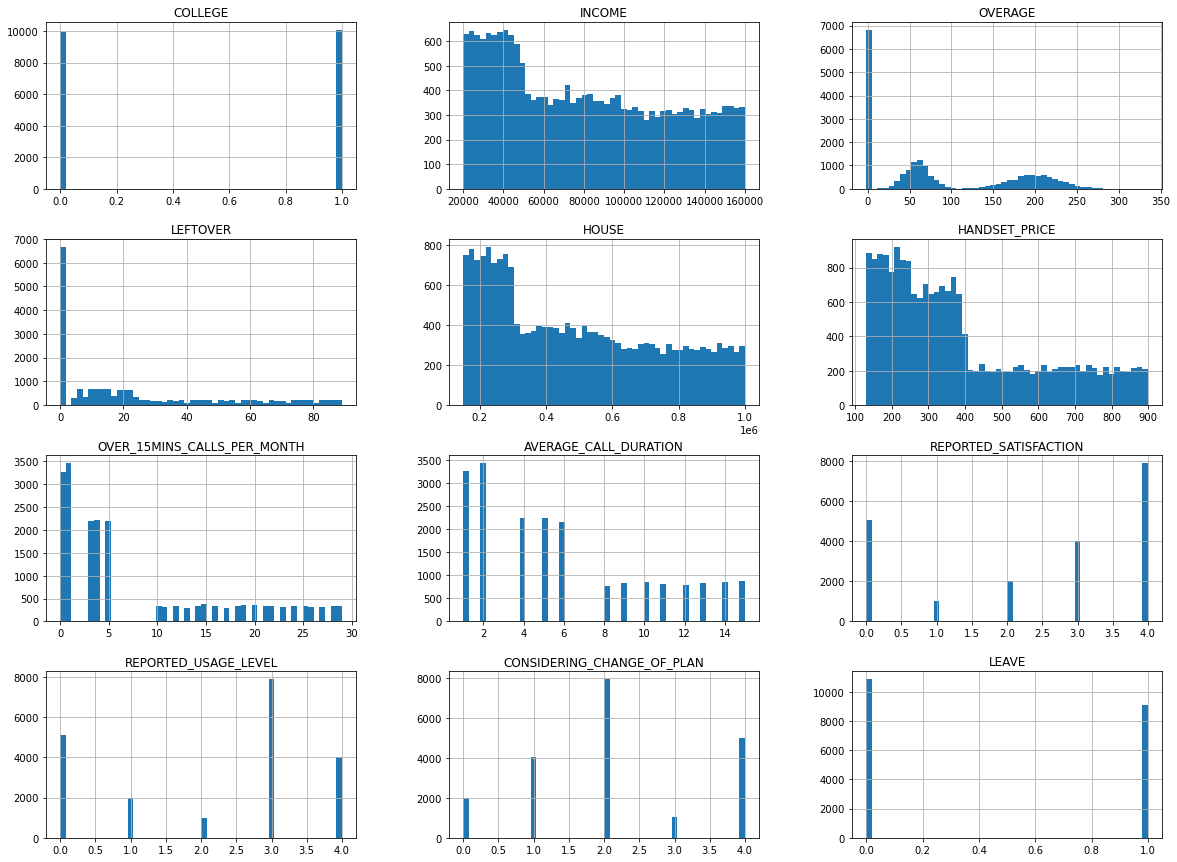

In [8]:
df.hist(bins=50, figsize=(20,15))

**Obersvations**:
   
- These attributes have very different scales. Each histogram gives us information about the range of values in each attribute. Some attributes are in minutes, others in USD ranging in the thousands, like INCOME and HOUSE, and some represent values on a point scale.

Further data transformation operations include: 
- Normalize all attributes by converting them into the same scale. This transformation would also help to deal with outliers.
- Many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some algorithms to detect patterns. Data transformation tasks also include altering attributes to exhibit more bell-shaped distributions.

### Target variable distribution

It is important to check the distribution of the target variable to detect class imbalance problems.

Class imbalance happens when the distribution of records across the known classes is biased or skewed. The distribution can vary from a slight bias to a severe imbalance where there is one record in one class for hundreds, thousands, or millions of examples in the other classes.

Class imbalance poses a challenge for predictive modeling as most of the algorithms used for classification are designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the class with fewer examples.

<AxesSubplot:>

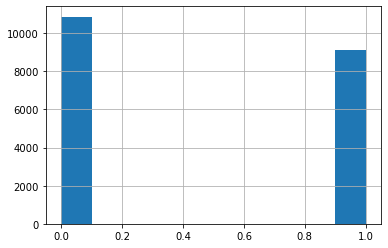

In [9]:
df['LEAVE'].hist()

Values interpretation in the plot:
- LEAVE = 0: customer stays
- LEAVE = 1: cusomter churns (leaves)

**Observations**

In the plot, the STAY class (LEAVE = 0) has a slightly higher number of examples than the CHURN class (LEAVE = 1). 

The difference is very subtle, so we don't address class imbalance issues.

### Visualizing relationships between the target  and attributes 

So far, we have only taken a glance at the data to get a general understanding of the kind of data we are manipulating. Now the goal is to go into a little more depth.

Since the dataset is not too large, we can quickly generate visualizations to check correlations between the attributes and the target variable. 

The Python code necessary for generating these visualizations vary for continuous and discrete attributes.

**For continuous attributes:**

In [10]:
def plot_class_attribute_dist(df, class_var, attribute):
    df.groupby(class_var)[attribute].plot.hist(
        alpha=0.4, figsize=(GRAPH_WIDTH, GRAPH_HEIGHT))
    plt.suptitle(attribute)
    plt.legend()

#### House value versus leave

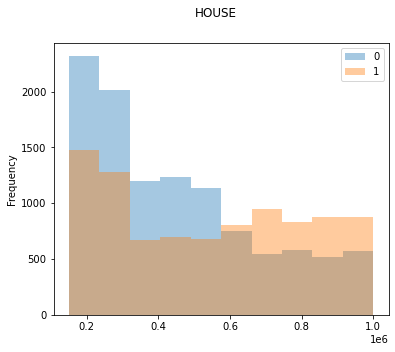

In [11]:
plot_class_attribute_dist(df, 'LEAVE', 'HOUSE')

Values interpretation in the plot:
- LEAVE = 0 (blue): customer stays
- LEAVE = 1 (orange): cusomter churns (leaves)

**Obersvations**:

The plot shows a variation in the trends of customers that stay and leave. Approximately before the house value of 600K, the number of customers staying (blue) overtakes the customers leaving (orange). However, after the value of 600K, the number of customers that leave surpasses the number of customers that stay.

Thus, we can claim the data suggests that number of customers that leave increases as the house value increases.

#### Income versus leave

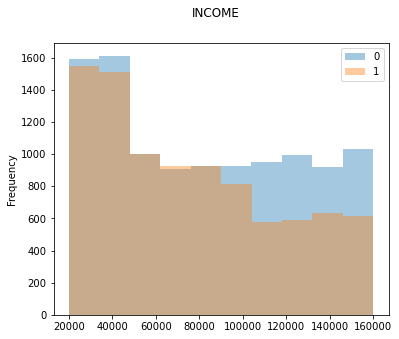

In [12]:
plot_class_attribute_dist(df, 'LEAVE', 'INCOME')

Values interpretation in the plot:
- LEAVE = 0 (blue): customer stays
- LEAVE = 1 (orange): cusomter churns (leaves)

**Obersvations**:

This plot shows an opposite effect to the previous plot. Here, the number of customers that leave decreases as income increases.

#### Handset price versus target variable plot

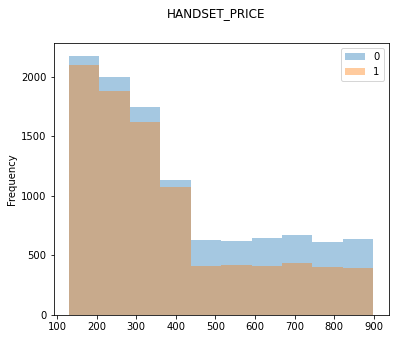

In [13]:
plot_class_attribute_dist(df, 'LEAVE', 'HANDSET_PRICE')

**Obersvations**:

It is hard to discern any pattern in the plot

**Discreete attributes:**

#### College versus leave

<AxesSubplot:xlabel='COLLEGE', ylabel='count'>

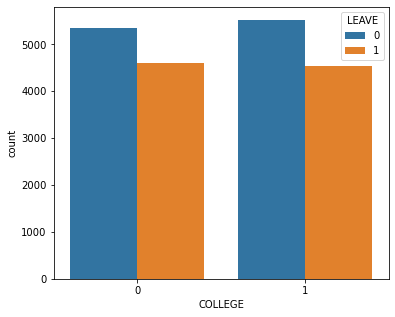

In [14]:
plt.figure(figsize=(GRAPH_WIDTH, GRAPH_HEIGHT))
sns.countplot(x='COLLEGE', hue='LEAVE', data=df)

**Obersvations**:

The plot does not show any apparent patterns.

#### Reported satisfaction versus leave

<AxesSubplot:xlabel='REPORTED_SATISFACTION', ylabel='count'>

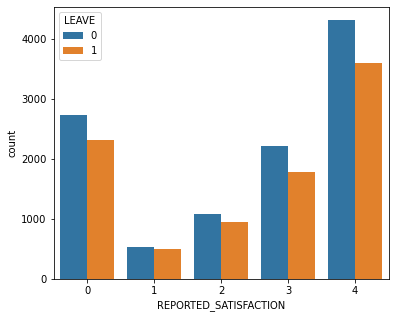

In [15]:
plt.figure(figsize=(GRAPH_WIDTH, GRAPH_HEIGHT))
sns.countplot(x='REPORTED_SATISFACTION', hue='LEAVE', data=df)

**Obersvations**:

Again, the plot does not show any apparent patterns.

Surprisingly, REPORTED_SATISFACTION does not seem to correlate with LEAVE

#### General observations:

HOUSE and INCOME seem to be promising attributes to predict LEAVE. 

These visualizations are good indicators that we can use later to explain the model's results and convince the audience about the applicability of a data mining solution.

## 4. Data Modeling

At this point, you have framed the problem and got the data, and explored it. Now, we will select and train a classification model using the tree induction technique explained in class.

We will use Scikit-learn to build our classification tree.

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression, and other types of algorithms, including support vector machines.

Scikit-learn is designed to interoperate with NumPy and Pandas DataFrames.

### Fitting a classification tree

To build our decision tree using the customer churn dataset, we will use Scikit-learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class.

In [16]:
training = df.loc[:, df.columns != 'LEAVE']
labels = df['LEAVE']

The DecisionTreeClassifier class allows for different parameters that influence the learning process.

First, we will specify the depth as two and the criterion as entropy. The criterion refers to the impurity measure used to segment the data.

A shallow tree will give us some insights into the building process and easily interpret the results.

In [17]:
tree_depth_2 = DecisionTreeClassifier(
    criterion = "entropy", # “gini” or “entropy”, default=”gini”
    max_depth = 2)

The fit () method performs the building or fitting of the model to the data. This method takes two datasets for supervised learning algorithms:
- The first dataset contains the attributes 
- The second dataset contains the labels.

Any other parameter needed to guide the fitting process is considered a hyperparameter (such as the impurity measure and tree depth). It must be set as an instance variable, generally via a constructor parameter.

In [18]:
tree_depth_2.fit(training, labels)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

The following picture shows the resulting tree:

![Decision Tree Depth = 2](images/customer-churn_tree-depth-2.png)

**Classification tree with depth = 3 tree**

![Decision Tree Depth = 3](images/customer-churn_tree-depth-3.png)

**What is the difference between the depth=2 and depth=3 trees?**:

From the pictures, it is evident that as we increase the depth of the tree, the resulting leaves contain lower entropy values, suggesting more pure segments and increased predictable capability by the model.

### Making predictions

A classification model object, given a dataset, should be capable of making predictions.

Classification model objects have a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions.

To generate the predictions, we will use the same training dataset used for fitting the model:

In [19]:
labels_pred = tree_depth_2.predict(training)
labels_pred

array([0, 1, 0, ..., 0, 0, 0])

Using the classification model object, we will also calculate the class probabilities:

In [20]:
class_probabilities = tree_depth_2.predict_proba(training)
class_probabilities

array([[0.52994453, 0.47005547],
       [0.27339084, 0.72660916],
       [0.81143248, 0.18856752],
       ...,
       [0.52994453, 0.47005547],
       [0.52994453, 0.47005547],
       [0.61507761, 0.38492239]])

We will build a new DataFrame to display the class predictions and class probabilities:

In [21]:
# Turn LEAVE=0 to STAY and LEAVE=1 to CHURN for easier interpretation

interpret_label = lambda x: 'STAY' if x == 0 else 'CHURN'

In [22]:
# Interpret label values for both the training and predicted labels

labels_interpreted = list(map(interpret_label, labels))
labels_pred_interpreted = list(map(interpret_label, labels_pred))

In [23]:
prob_stay = [p[0] for p in class_probabilities]
prob_churn = [p[1] for p in class_probabilities]

In [24]:
predictions = pd.DataFrame({
    "Training label": labels_interpreted,
    "Predicted label": labels_pred_interpreted,
    "Probability STAY": prob_stay,
    "Probability CHURN": prob_churn,
})

predictions[:20]

,Training label,Predicted label,Probability STAY,Probability CHURN
0,CHURN,STAY,0.529945,0.470055
1,CHURN,CHURN,0.273391,0.726609
2,CHURN,STAY,0.811432,0.188568
3,STAY,STAY,0.615078,0.384922
4,CHURN,STAY,0.811432,0.188568
5,CHURN,STAY,0.615078,0.384922
6,CHURN,CHURN,0.273391,0.726609
7,CHURN,CHURN,0.273391,0.726609
8,CHURN,STAY,0.529945,0.470055
9,STAY,STAY,0.811432,0.188568


### Evaluating performance

As a simple measure of performance, we can compute the ratio between correct and wrong predictions.

Later in the course, we will look at more comprehensive ways to measure a classification model's performance that include concepts such as recall and precision.

In [25]:
def evaluate_performance(tree_clf, training, labels):
    labels_pred = tree_clf.predict(training)
    n_correct = sum(labels_pred == labels)    
    print(
        f"Model performance of tree depth={tree_clf.get_depth()}: {((n_correct / len(labels_pred)) * 100):.2f}%")

In [26]:
evaluate_performance(tree_depth_2, training, labels)

Model performance of tree depth=2: 64.58%


### Fine-tune your model

To improve the perfomance of our tree classifier, we will now build a tree with a higher depth (depth = 10) and evaluate its performance.

In [27]:
tree_depth_10 = DecisionTreeClassifier(
    max_depth = 10)

tree_depth_10.fit(training, labels)

DecisionTreeClassifier(max_depth=10)

In [28]:
evaluate_performance(tree_depth_10, training, labels)

Model performance of tree depth=10: 73.92%


From 64.58% we jumped to 73.89%. Not bad!

Now, we won't impose any restriction on the classifier, allowing the algorithm to determine the tree's depth:

In [29]:
tree_depth_free = DecisionTreeClassifier()
tree_depth_free.fit(training, labels)

DecisionTreeClassifier()

In [30]:
evaluate_performance(tree_depth_free, training, labels)

Model performance of tree depth=44: 100.00%


**Wait, what!?**

No error at all? Could this model really be absolutely perfect?

Of course, it is much more likely that something went wrong by letting the tree grow uncontrolled. Look at a depth of the tree: Above 40 levels! 

How can we know what the proper depth is? Definitely, we need a better mechanism for evaluating the performance of different trees to choose the proper depth and most realistic model.

We will look later into this problem in detail when learning about overfitting and its avoidance.

### Assessing feature importance

Lastly, we will compute feature importance values to gain insight into the criteria used by the induction algorithm to segment the training dataset.

In [31]:
feature_importances = pd.Series(
    tree_depth_free.feature_importances_,
    index=training.columns)

feature_importances.sort_values(inplace=True, ascending=False)
for feature in enumerate(feature_importances.index):
    print(f"{(feature[0]+1):02d}) {feature[1]:<30} {feature_importances[feature[0]]:.4f}")

01) HOUSE                          0.2113
02) INCOME                         0.1855
03) OVERAGE                        0.1434
04) HANDSET_PRICE                  0.1371
05) LEFTOVER                       0.0988
06) OVER_15MINS_CALLS_PER_MONTH    0.0502
07) AVERAGE_CALL_DURATION          0.0489
08) CONSIDERING_CHANGE_OF_PLAN     0.0412
09) REPORTED_USAGE_LEVEL           0.0369
10) REPORTED_SATISFACTION          0.0297
11) COLLEGE                        0.0169


<AxesSubplot:>

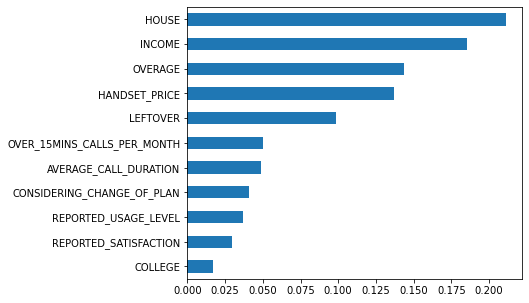

In [32]:
plt.figure(figsize=(GRAPH_WIDTH, GRAPH_HEIGHT))
feature_importances.sort_values(ascending=True).plot.barh()

## 5. Evaluation

After selecting the model with the best combination of hyperparameters (e.g. the tree depth), the last step is to evaluate its performance and assess its generability.

We will leave this task for another class.

## References

Provost, F., & Fawcett, T. (2013). Data science for business: what you need to know about data mining and data-analytic thinking. Chapter 3.

Géron, A. (2019) Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. Chapter 2.